In [1]:
# import all the neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Doctor_Train.xlsx to Doctor_Train.xlsx


In [3]:
#Loading the Train and Test data
Train_data = pd.read_excel('Data_Train.xlsx')
Test_data  = pd.read_excel('Data_Test.xlsx')

In [4]:
# Seeing first five rows of Training data
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
Train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [6]:
# Seeing first five rows of Testing data
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [7]:
# Checking the shape of train and test data

print('Train_data:',Train_data.shape)
print('\n')
print('Test_data:',Test_data.shape)

Train_data: (12690, 9)


Test_data: (4231, 8)


## **Train_data**

In [8]:
#Checking the shape of Train data
Train_data.shape

(12690, 9)

Observation:

There are 12690 rows and 9 columns are present in train dataset

In [9]:
#Checking the columns of Train data
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

**checking for missing values**

In [10]:
#Checking  for  anynull values
Train_data.isnull().values.any()

True

In [11]:
#checking for null values in columns
Train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

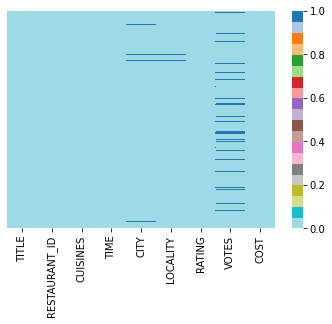

In [12]:
#Now we check  for null value via visualization

sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=True,cmap='tab20_r')
plt.show()

Observation:

1-There are 112 null values are present in CITY column.

2-98 null values are present in LOCALITY column.

3-2 null values present in RATING column.

4-1204 null values are present in VOTES column.

In [13]:
#checking the information of column
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Observation:

1-CITY, LOCALITY, RATING AND VOTES column contain missing values.

2-All of these  varibles are of categorical datatype .So, we impute the missing values with most frequent value i.e. mode.

In [14]:
#Imputing the missing value with mode

for col in ['CITY','LOCALITY','RATING','VOTES']:
  Train_data[col].fillna(Train_data[col].mode()[0],inplace=True)

In [15]:
#now again check for missing values
Train_data.isnull().values.any()

False

In [16]:
#checking for null values in columns again
Train_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

Observation :

There is no null value present in our dataset.

In [17]:
#Now checking the shape
Train_data.shape

(12690, 9)

In [18]:
#checking the datatypes of train dataset
Train_data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Observation

1- All the columns are object type except RESTAURANT_ID and COST column which are int data type .COST is  our independent variable.

2- Before going further we have to change the data type of column which have object data type and also we have to change the value inside the columns because our model does not understand string values.

**We have to create separate columns for TITLE, CUISINES, TIME for analyzing**

In [19]:
#Splitting Titles in two various columns
Train_data['TITLE_1'] = Train_data['TITLE'].str.split(',').str[0]
Train_data['TITLE_2'] = Train_data['TITLE'].str.split(',').str[1]

In [20]:
#Splitting cousines in four various columns
Train_data['CUISINES_1'] = Train_data['CUISINES'].str.split(',').str[0]
Train_data['CUISINES_2'] = Train_data['CUISINES'].str.split(',').str[1]
Train_data['CUISINES_3'] = Train_data['CUISINES'].str.split(',').str[2]
Train_data['CUISINES_4'] = Train_data['CUISINES'].str.split(',').str[3]

In [21]:
#Splitting Time in two various columns
Train_data['TIME_1'] = Train_data['TIME'].str.split(',').str[0]
Train_data['TIME_2'] = Train_data['TIME'].str.split(',').str[1]

In [22]:
#now we drop title, time and ciusine columns as it has no use
Train_data.drop(['TITLE'],axis=1, inplace= True)
Train_data.drop(['CUISINES'],axis=1, inplace= True)
Train_data.drop(['TIME'],axis=1, inplace= True)

In [23]:
Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NaN,Malwani,Goan,North Indian,NaN,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,13198,Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NaN,6pm – 11pm (Mon-Sun),NaN
2,10915,Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NaN,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,6346,Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NaN,Tibetan,Chinese,NaN,NaN,11:30am – 1am (Mon-Sun),NaN
4,15387,Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NaN,Desserts,NaN,NaN,NaN,11am – 1am (Mon-Sun),NaN


In [24]:
#checking  for null values again
Train_data.isnull().values.any()

True

Observation:

We see there are null values and there is 'None' present in our dataset which is treated as null values.

In [25]:
#checking the information of dataset
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RESTAURANT_ID  12690 non-null  int64 
 1   CITY           12690 non-null  object
 2   LOCALITY       12690 non-null  object
 3   RATING         12690 non-null  object
 4   VOTES          12690 non-null  object
 5   COST           12690 non-null  int64 
 6   TITLE_1        12690 non-null  object
 7   TITLE_2        1482 non-null   object
 8   CUISINES_1     12690 non-null  object
 9   CUISINES_2     9628 non-null   object
 10  CUISINES_3     5691 non-null   object
 11  CUISINES_4     2695 non-null   object
 12  TIME_1         12690 non-null  object
 13  TIME_2         3252 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.4+ MB


Oservation:
    
There are  missing values in our dataset also'None' is present so we will encode this as Nan value.

In [26]:
#Replacing the 'None' with NaN
Train_data=Train_data.replace('None',np.nan)
Train_data

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NaN,Malwani,Goan,North Indian,NaN,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,13198,Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NaN,6pm – 11pm (Mon-Sun),NaN
2,10915,Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NaN,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,6346,Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NaN,Tibetan,Chinese,NaN,NaN,11:30am – 1am (Mon-Sun),NaN
4,15387,Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NaN,Desserts,NaN,NaN,NaN,11am – 1am (Mon-Sun),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,Hyderabad,Gachibowli,3.8,546 votes,500,QUICK BITES,NaN,North Indian,Burger,Kebab,NaN,12noon – 12midnight (Mon,Tue
12686,9686,Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,CASUAL DINING,BAR,Goan,Continental,NaN,NaN,12noon – 1am (Mon-Fri),11am – 5pm
12687,11133,Navi Mumbai,Vashi,4.0,608 votes,1300,LOUNGE,NaN,Finger Food,Continental,Asian,Chinese,12noon – 12:30AM (Mon-Sun),NaN
12688,6134,Chennai,Maduravoyal,3.5,32 votes,400,CASUAL DINING,NaN,North Indian,South Indian,Chinese,Street Food,6am – 10:45pm (Mon-Sun),NaN


In [27]:
#now we check null values for particular column
#checking for null values
Train_data.isnull().sum()

RESTAURANT_ID        0
CITY                 0
LOCALITY             0
RATING               0
VOTES                0
COST                 0
TITLE_1           1003
TITLE_2          11208
CUISINES_1           0
CUISINES_2        3062
CUISINES_3        6999
CUISINES_4        9995
TIME_1               0
TIME_2            9438
dtype: int64

Observation:

1-There are 1003 null values are present in TITLE_1  column

2-11208 null values are present in TITLE_2 column.

3-3062 null values present in CUISINES_2  column.

3-6999 null values present in CUISINES_3  column.

3-9995 null values present in CUISINES_4  column.

3-9438 null values present in TIME_2  column.



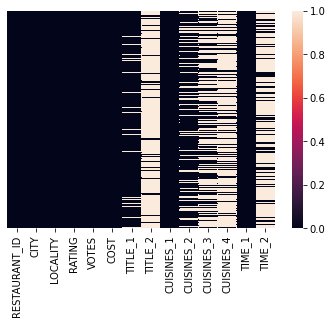

In [28]:
#checking null values using heatmap
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=True)

In [29]:
#checking the information of column agian
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RESTAURANT_ID  12690 non-null  int64 
 1   CITY           12690 non-null  object
 2   LOCALITY       12690 non-null  object
 3   RATING         12690 non-null  object
 4   VOTES          12690 non-null  object
 5   COST           12690 non-null  int64 
 6   TITLE_1        11687 non-null  object
 7   TITLE_2        1482 non-null   object
 8   CUISINES_1     12690 non-null  object
 9   CUISINES_2     9628 non-null   object
 10  CUISINES_3     5691 non-null   object
 11  CUISINES_4     2695 non-null   object
 12  TIME_1         12690 non-null  object
 13  TIME_2         3252 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.4+ MB


Observation:

TITLE_1, TITLE_2 , CUISINES_2, CUISINES_3, CUISINES_4, TIME_2 contain missing values.All of these varibles are categorical datatype .So, we impute the missing values with most frequent value i.e. mode.

In [30]:
#Imputing the missing value with mode

for col in ['TITLE_1','TITLE_2','CUISINES_2','CUISINES_3','CUISINES_4','TIME_2']:
  Train_data[col].fillna(Train_data[col].mode()[0],inplace=True)

In [31]:
#checking  for null values again
Train_data.isnull().values.any()

False

null values are removed

**Handling Categorical Data**

In [32]:
Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,BAR,Malwani,Goan,North Indian,Chinese,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,13198,Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,Chinese,6pm – 11pm (Mon-Sun),7pm – 11pm (Mon-Sun)
2,10915,Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,BAR,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,6346,Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,BAR,Tibetan,Chinese,Chinese,Chinese,11:30am – 1am (Mon-Sun),7pm – 11pm (Mon-Sun)
4,15387,Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,BAR,Desserts,Chinese,Chinese,Chinese,11am – 1am (Mon-Sun),7pm – 11pm (Mon-Sun)


We have to convert CITY, LOCALITY, VOTES, TITLE_1 ,TITLE_2, CUISINES_1, CUISINES_2,CUISINES_3, CUISINES_4, TIME_1, and TIME_2 into int data

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#CITY
Train_data['CITY']=le.fit_transform(Train_data['CITY'])

#LOCALITY
Train_data['LOCALITY']=le.fit_transform(Train_data['LOCALITY'])

#TITLE_1
Train_data['TITLE_1']=le.fit_transform(Train_data['TITLE_1'])

#TITLE_2
Train_data['TITLE_2']=le.fit_transform(Train_data['TITLE_2'])

#CUISINES_1
Train_data['CUISINES_1']=le.fit_transform(Train_data['CUISINES_1'])

#CUISINES_2
Train_data['CUISINES_2']=le.fit_transform(Train_data['CUISINES_2'])

#CUISINES_3
Train_data['CUISINES_3']=le.fit_transform(Train_data['CUISINES_3'])

#CUISINES_4
Train_data['CUISINES_4']=le.fit_transform(Train_data['CUISINES_4'])

#TIME_1
Train_data['TIME_1']=le.fit_transform(Train_data['TIME_1'])

#TIME_2
Train_data['TIME_2']=le.fit_transform(Train_data['TIME_2'])

#for votes we have to remove votes.
Train_data=Train_data.replace(['votes'],[''],regex=True)

In [34]:
Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49,1200,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30,1500,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221,800,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24,800,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165,300,8,1,28,23,21,18,316,291


In [35]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RESTAURANT_ID  12690 non-null  int64 
 1   CITY           12690 non-null  int64 
 2   LOCALITY       12690 non-null  int64 
 3   RATING         12690 non-null  object
 4   VOTES          12690 non-null  object
 5   COST           12690 non-null  int64 
 6   TITLE_1        12690 non-null  int64 
 7   TITLE_2        12690 non-null  int64 
 8   CUISINES_1     12690 non-null  int64 
 9   CUISINES_2     12690 non-null  int64 
 10  CUISINES_3     12690 non-null  int64 
 11  CUISINES_4     12690 non-null  int64 
 12  TIME_1         12690 non-null  int64 
 13  TIME_2         12690 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 1.4+ MB


In [36]:
# VOTES AND Rating are of object type we have to them into float

#for VOTES
Train_data['VOTES'].unique()
Train_data['VOTES']=Train_data['VOTES'].astype(float)
Train_data['VOTES']=Train_data['VOTES'].fillna(Train_data['VOTES'].mean())

#for RATING
Train_data['RATING'].unique()
Train_data['RATING']=Train_data['RATING'].replace(['NEW'],np.nan)
Train_data['RATING']=Train_data['RATING'].replace(['-'],np.nan)
Train_data['RATING']=Train_data['RATING'].astype(float)
Train_data['RATING']=Train_data['RATING'].fillna(Train_data['RATING'].mean())

Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49.0,1200,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30.0,1500,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221.0,800,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24.0,800,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165.0,300,8,1,28,23,21,18,316,291


In [37]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RESTAURANT_ID  12690 non-null  int64  
 1   CITY           12690 non-null  int64  
 2   LOCALITY       12690 non-null  int64  
 3   RATING         12690 non-null  float64
 4   VOTES          12690 non-null  float64
 5   COST           12690 non-null  int64  
 6   TITLE_1        12690 non-null  int64  
 7   TITLE_2        12690 non-null  int64  
 8   CUISINES_1     12690 non-null  int64  
 9   CUISINES_2     12690 non-null  int64  
 10  CUISINES_3     12690 non-null  int64  
 11  CUISINES_4     12690 non-null  int64  
 12  TIME_1         12690 non-null  int64  
 13  TIME_2         12690 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.4 MB


**Now all the Train dataset columns change into numeric data type. now same steps are follow in test data**

## **Test Data**

In [38]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


**Now we copy the same steps for test data in one cell.**

In [39]:
#Imputing the missing value with mode

for col in ['CITY','LOCALITY','RATING','VOTES']:
  Test_data[col].fillna(Test_data[col].mode()[0],inplace=True)

#Splitting Titles in two various columns
Test_data['TITLE_1'] = Test_data['TITLE'].str.split(',').str[0]
Test_data['TITLE_2'] = Test_data['TITLE'].str.split(',').str[1] 

#Splitting cousines in four various columns
Test_data['CUISINES_1'] = Test_data['CUISINES'].str.split(',').str[0]
Test_data['CUISINES_2'] = Test_data['CUISINES'].str.split(',').str[1]
Test_data['CUISINES_3'] = Test_data['CUISINES'].str.split(',').str[2]
Test_data['CUISINES_4'] = Test_data['CUISINES'].str.split(',').str[3]

#Splitting Time in two various columns
Test_data['TIME_1'] = Test_data['TIME'].str.split(',').str[0]
Test_data['TIME_2'] = Test_data['TIME'].str.split(',').str[1]

#now we drop title, time and ciusine columns as it has no use
Test_data.drop(['TITLE'],axis=1, inplace= True)
Test_data.drop(['CUISINES'],axis=1, inplace= True)
Test_data.drop(['TIME'],axis=1, inplace= True)


#Replacing the 'None' with NaN
Test_data=Train_data.replace('None',np.nan)

#Imputing the missing value with mode

for col in ['TITLE_1','TITLE_2','CUISINES_2','CUISINES_3','CUISINES_4','TIME_2']:
  Test_data[col].fillna(Test_data[col].mode()[0],inplace=True)

#encoding

#CITY
Test_data['CITY']=le.fit_transform(Test_data['CITY'])

#LOCALITY
Test_data['LOCALITY']=le.fit_transform(Test_data['LOCALITY'])

#TITLE_1
Test_data['TITLE_1']=le.fit_transform(Test_data['TITLE_1'])

#TITLE_2
Test_data['TITLE_2']=le.fit_transform(Test_data['TITLE_2'])

#CUISINES_1
Test_data['CUISINES_1']=le.fit_transform(Test_data['CUISINES_1'])

#CUISINES_2
Test_data['CUISINES_2']=le.fit_transform(Test_data['CUISINES_2'])

#CUISINES_3
Test_data['CUISINES_3']=le.fit_transform(Test_data['CUISINES_3'])

#CUISINES_4
Test_data['CUISINES_4']=le.fit_transform(Test_data['CUISINES_4'])

#TIME_1
Test_data['TIME_1']=le.fit_transform(Test_data['TIME_1'])

#TIME_2
Test_data['TIME_2']=le.fit_transform(Test_data['TIME_2'])



In [40]:

# VOTES AND Rating are of object type we have to them into float

#for VOTES
Test_data['VOTES'].unique()
Test_data['VOTES']=Test_data['VOTES'].astype(float)
Test_data['VOTES']=Test_data['VOTES'].fillna(Test_data['VOTES'].mean())

#for RATING
Test_data['RATING'].unique()
Test_data['RATING']=Test_data['RATING'].replace(['NEW'],np.nan)
Train_data['RATING']=Test_data['RATING'].replace(['-'],np.nan)
Test_data['RATING']=Test_data['RATING'].astype(float)
Test_data['RATING']=Test_data['RATING'].fillna(Test_data['RATING'].mean())

In [41]:
Test_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49.0,1200,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30.0,1500,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221.0,800,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24.0,800,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165.0,300,8,1,28,23,21,18,316,291


In [42]:
test=Test_data

# **Exploratory Data Analysis**

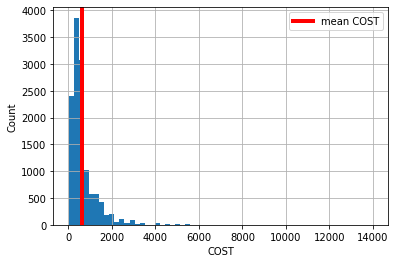

In [43]:
#Checking the mean COST.

price = Train_data['COST'].hist(bins=60)
mean_val = np.mean(Train_data['COST'])
plt.axvline(mean_val,linewidth=4, color='red', label='mean COST')
plt.xlabel('COST')
plt.ylabel('Count')
plt.legend()
plt.show()

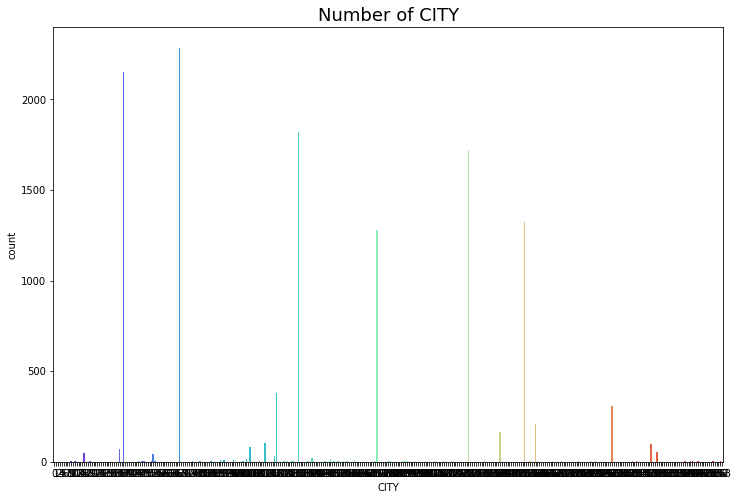

67     2286
37     2149
131    1819
222    1722
252    1321
       ... 
356       1
5         1
13        1
21        1
0         1
Name: CITY, Length: 359, dtype: int64


In [44]:
df1=Train_data
plt.subplots(figsize=(12,8))
sns.countplot(x='CITY',data=df1,palette='rainbow')
plt.title('Number of CITY',fontsize=18)
plt.show()

print(df1['CITY'].value_counts())

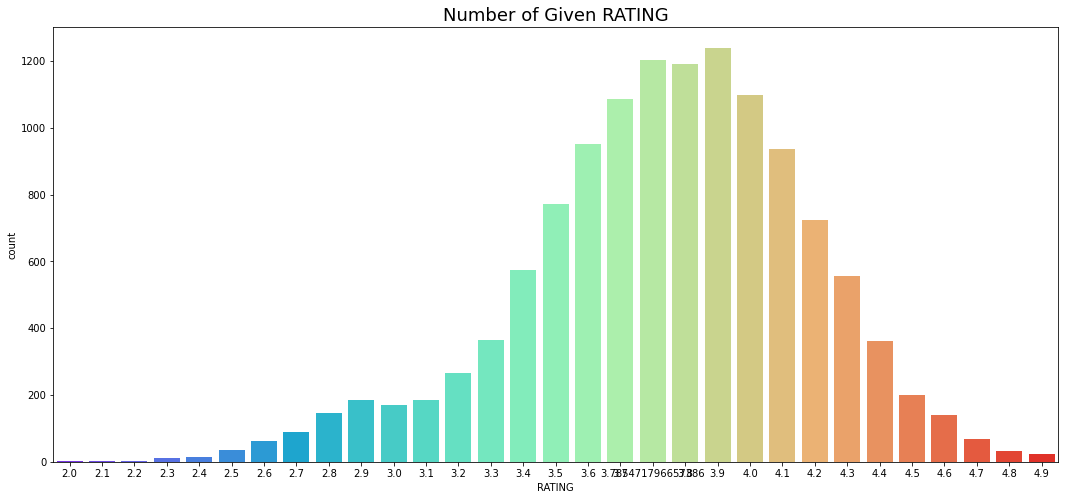

3.900000    1240
3.785472    1202
3.800000    1190
4.000000    1099
3.700000    1086
3.600000     951
4.100000     936
3.500000     771
4.200000     723
3.400000     575
4.300000     556
3.300000     365
4.400000     362
3.200000     266
4.500000     199
2.900000     186
3.100000     186
3.000000     170
2.800000     146
4.600000     141
2.700000      89
4.700000      69
2.600000      61
2.500000      35
4.800000      32
4.900000      22
2.400000      15
2.300000      10
2.100000       3
2.200000       2
2.000000       2
Name: RATING, dtype: int64


In [45]:
plt.subplots(figsize=(18,8))
sns.countplot(x='RATING',data=df1,palette='rainbow')
plt.title('Number of Given RATING',fontsize=18)
plt.show()

print(df1['RATING'].value_counts())

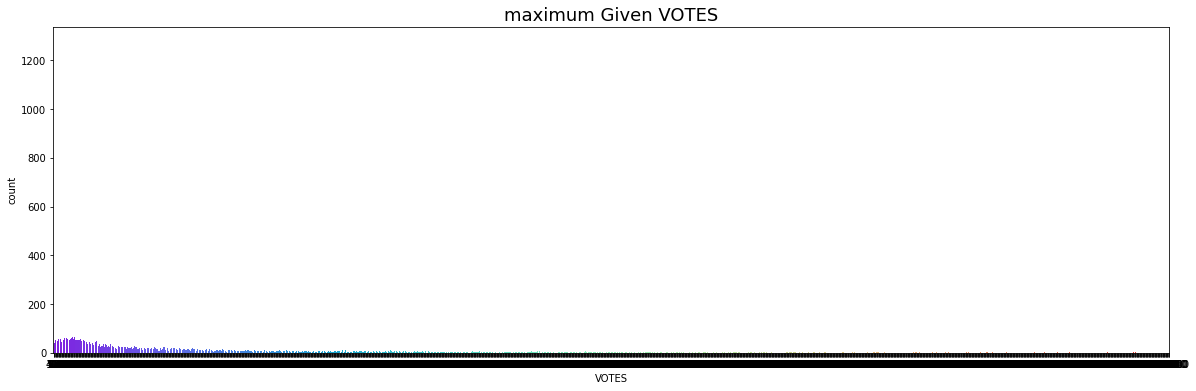

44.0      1275
29.0        66
28.0        66
38.0        65
35.0        64
          ... 
4801.0       1
2923.0       1
1273.0       1
5227.0       1
1654.0       1
Name: VOTES, Length: 1847, dtype: int64


In [46]:
plt.subplots(figsize=(20,6))
sns.countplot(x='VOTES',data=df1,palette='rainbow')
plt.title('maximum Given VOTES',fontsize=18)
plt.show()

print(df1['VOTES'].value_counts())

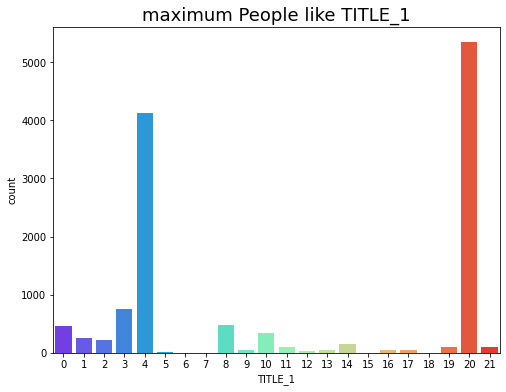

20    5340
4     4122
3      749
8      478
0      463
10     350
1      254
2      215
14     154
19     103
21     102
11      93
13      56
16      53
9       45
17      44
12      30
5       23
6        6
18       4
7        3
15       3
Name: TITLE_1, dtype: int64


In [47]:
plt.subplots(figsize=(8,6))
sns.countplot(x='TITLE_1',data=df1,palette='rainbow')
plt.title('maximum People like TITLE_1',fontsize=18)
plt.show()

print(df1['TITLE_1'].value_counts())

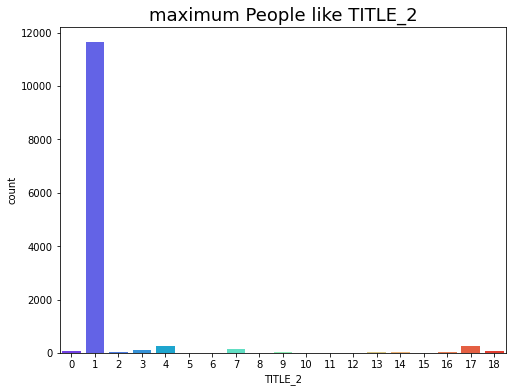

1     11636
17      261
4       257
7       138
3        94
0        69
18       53
13       47
16       35
2        34
14       27
9        15
8         8
5         5
12        4
11        3
6         2
10        1
15        1
Name: TITLE_2, dtype: int64


In [48]:
plt.subplots(figsize=(8,6))
sns.countplot(x='TITLE_2',data=df1,palette='rainbow')
plt.title('maximum People like TITLE_2',fontsize=18)
plt.show()

print(df1['TITLE_2'].value_counts())

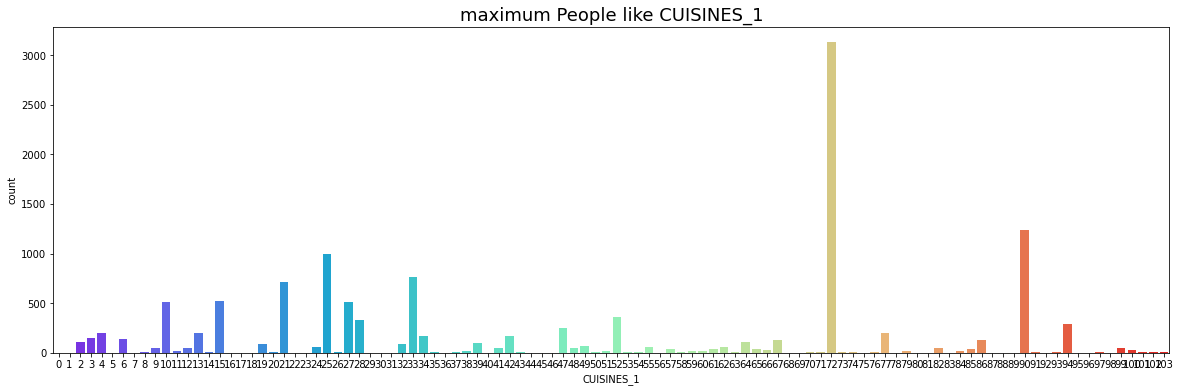

72    3129
90    1241
25     996
33     762
21     713
      ... 
5        1
68       1
44       1
83       1
0        1
Name: CUISINES_1, Length: 104, dtype: int64


In [49]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES_1',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES_1',fontsize=18)
plt.show()

print(df1['CUISINES_1'].value_counts())

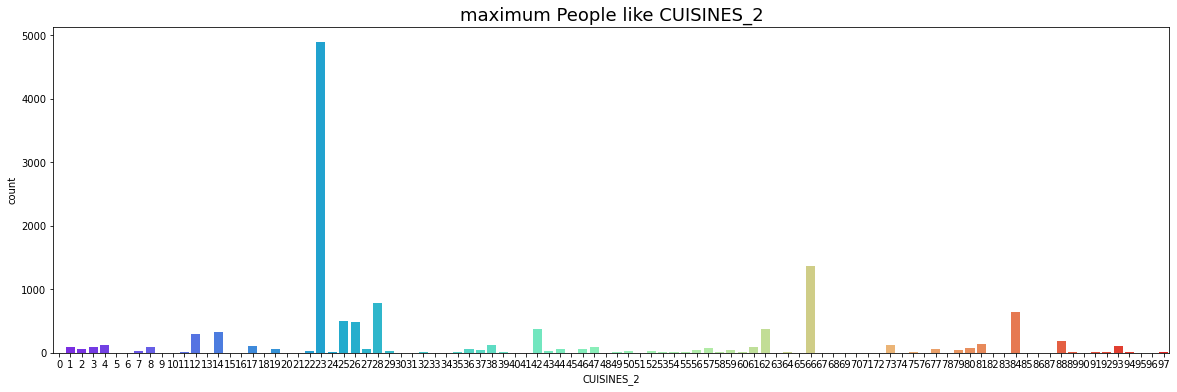

23    4892
66    1373
28     782
84     638
25     497
      ... 
5        1
76       1
67       1
33       1
10       1
Name: CUISINES_2, Length: 98, dtype: int64


In [50]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES_2',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES_2',fontsize=18)
plt.show()

print(df1['CUISINES_2'].value_counts())

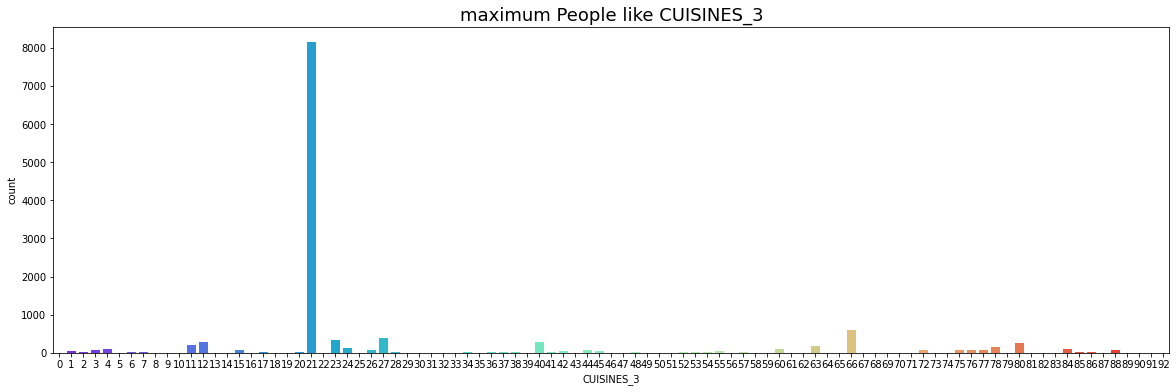

21    8145
66     593
27     387
23     345
40     276
      ... 
61       1
30       1
9        1
14       1
64       1
Name: CUISINES_3, Length: 93, dtype: int64


In [51]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES_3',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES_3',fontsize=18)
plt.show()

print(df1['CUISINES_3'].value_counts())

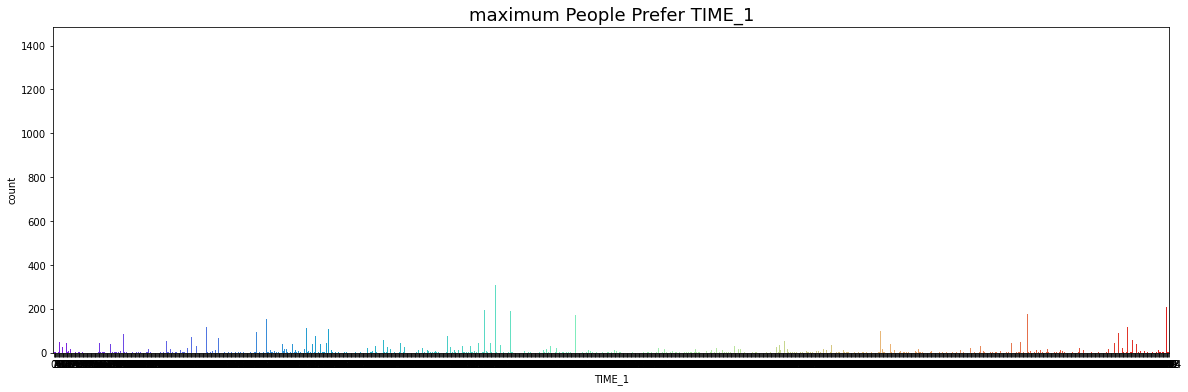

290    1415
525     469
514     407
305     310
552     308
       ... 
60        1
52        1
44        1
28        1
0         1
Name: TIME_1, Length: 1395, dtype: int64


In [52]:
plt.subplots(figsize=(20,6))
sns.countplot(x='TIME_1',data=df1,palette='rainbow')
plt.title('maximum People Prefer TIME_1',fontsize=18)
plt.show()

print(df1['TIME_1'].value_counts())

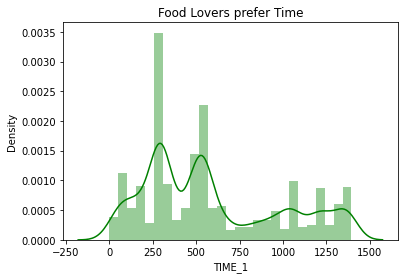

In [53]:
sns.distplot(df1['TIME_1'], color='g')
plt.title("Food Lovers prefer Time")
plt.show()

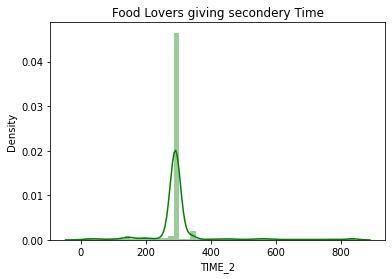

In [54]:
sns.distplot(df1['TIME_2'], color='g')
plt.title("Food Lovers giving secondery Time")
plt.show()

In [55]:
df1.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST',
       'TITLE_1', 'TITLE_2', 'CUISINES_1', 'CUISINES_2', 'CUISINES_3',
       'CUISINES_4', 'TIME_1', 'TIME_2'],
      dtype='object')

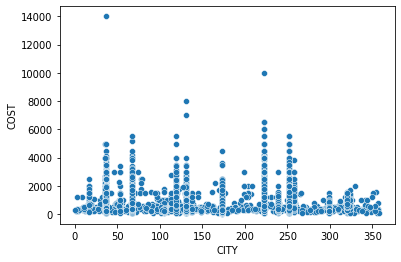

In [56]:
sns.scatterplot(x="CITY" ,y="COST",data=df1)

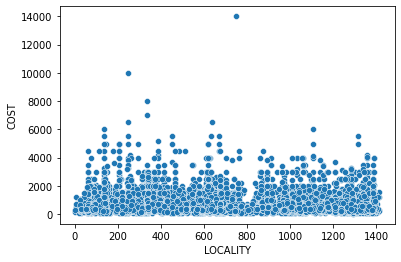

In [57]:
sns.scatterplot(x="LOCALITY" ,y="COST",data=df1)

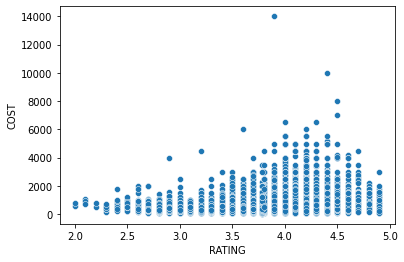

In [58]:
sns.scatterplot(x="RATING" ,y="COST",data=df1)

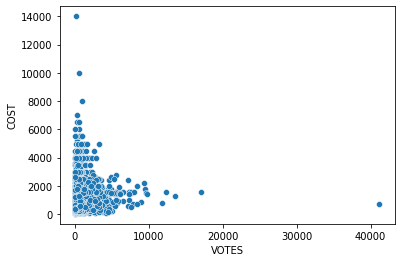

In [59]:
sns.scatterplot(x="VOTES" ,y="COST",data=df1)

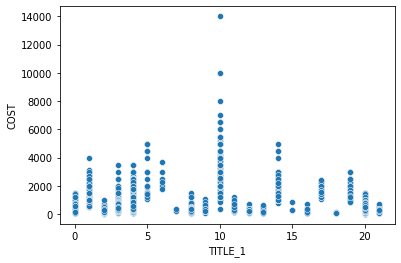

In [60]:
sns.scatterplot(x="TITLE_1" ,y="COST",data=df1)

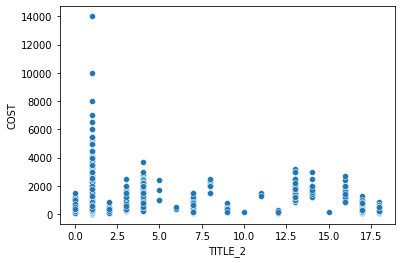

In [61]:
sns.scatterplot(x="TITLE_2" ,y="COST",data=df1)

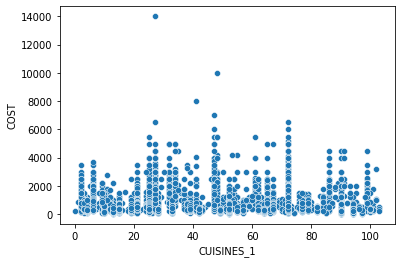

In [62]:
sns.scatterplot(x="CUISINES_1" ,y="COST",data=df1)

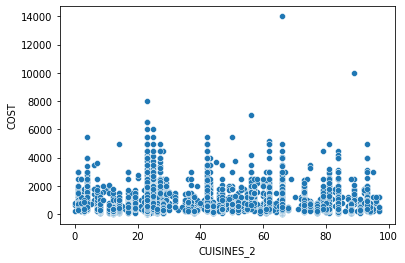

In [63]:
sns.scatterplot(x="CUISINES_2" ,y="COST",data=df1)

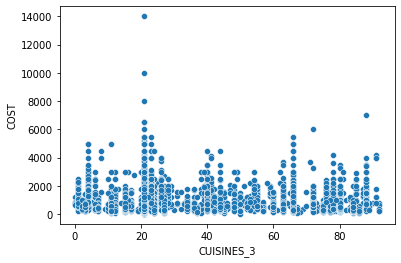

In [64]:
sns.scatterplot(x="CUISINES_3" ,y="COST",data=df1)

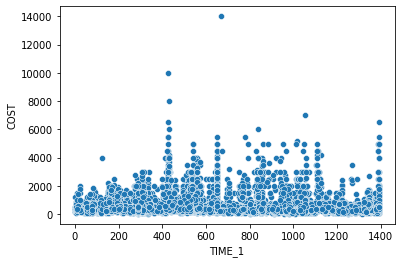

In [65]:
sns.scatterplot(x="TIME_1" ,y="COST",data=df1)

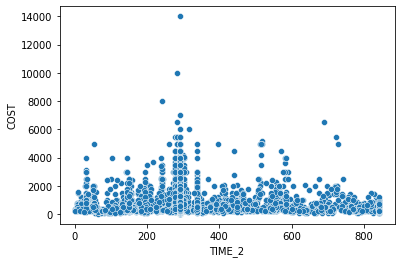

In [66]:
sns.scatterplot(x="TIME_2" ,y="COST",data=df1)

**Summary Statistics**

In [67]:
Train_data=df1

In [68]:
train=Train_data

In [69]:
Train_cor=Train_data.corr()
Train_cor

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
RESTAURANT_ID,1.000000,0.005112,-0.004242,0.031232,0.000403,0.040710,-0.000311,-0.015064,0.047963,0.027091,-0.010068,0.032396,0.005949,0.006779
CITY,0.005112,1.000000,0.043072,0.053272,0.043373,0.044555,-0.015925,0.000692,0.013487,0.019128,0.026046,0.022865,-0.011639,-0.021268
LOCALITY,-0.004242,0.043072,1.000000,-0.027983,-0.028965,-0.015050,0.028005,0.003047,0.019262,0.007060,-0.004419,-0.019878,-0.008307,-0.005642
RATING,0.031232,0.053272,-0.027983,1.000000,0.344759,0.320033,-0.157441,0.029417,-0.078193,0.008917,0.069002,0.089921,0.034239,0.076953
VOTES,0.000403,0.043373,-0.028965,0.344759,1.000000,0.255723,-0.144066,0.049878,-0.040369,0.039546,0.084202,0.121397,-0.027787,0.014767
COST,0.040710,0.044555,-0.015050,0.320033,0.255723,1.000000,-0.296176,0.018361,-0.038959,0.057167,0.110186,0.136278,-0.012331,-0.009951
TITLE_1,-0.000311,-0.015925,0.028005,-0.157441,-0.144066,-0.296176,1.000000,-0.108629,0.208093,-0.003936,-0.081686,-0.100541,0.056445,0.006111
TITLE_2,-0.015064,0.000692,0.003047,0.029417,0.049878,0.018361,-0.108629,1.000000,-0.105395,0.020972,0.027035,0.025001,0.035569,0.038771
CUISINES_1,0.047963,0.013487,0.019262,-0.078193,-0.040369,-0.038959,0.208093,-0.105395,1.000000,-0.019474,-0.070932,-0.042743,0.098981,-0.044552
CUISINES_2,0.027091,0.019128,0.007060,0.008917,0.039546,0.057167,-0.003936,0.020972,-0.019474,1.000000,0.048747,0.034233,0.044170,-0.022248


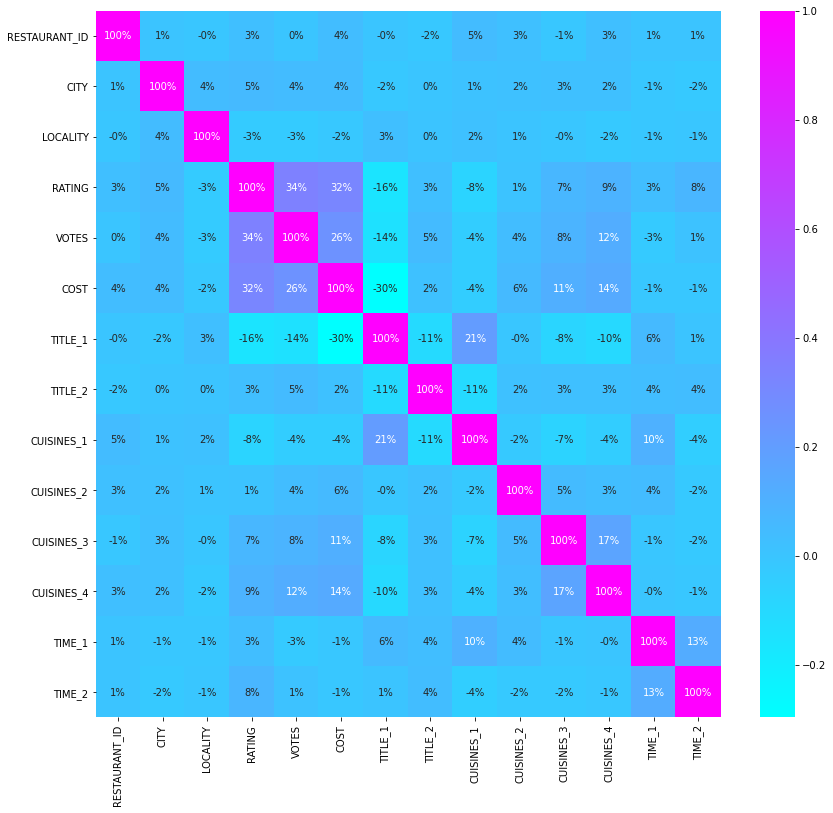

In [70]:
#checking correlaion using heatmap
plt.figure(figsize=(14,13))
sns.heatmap(Train_cor,annot=True,fmt='.0%',cmap='cool')

Text(0.5, 1.0, 'correlation with target variable')

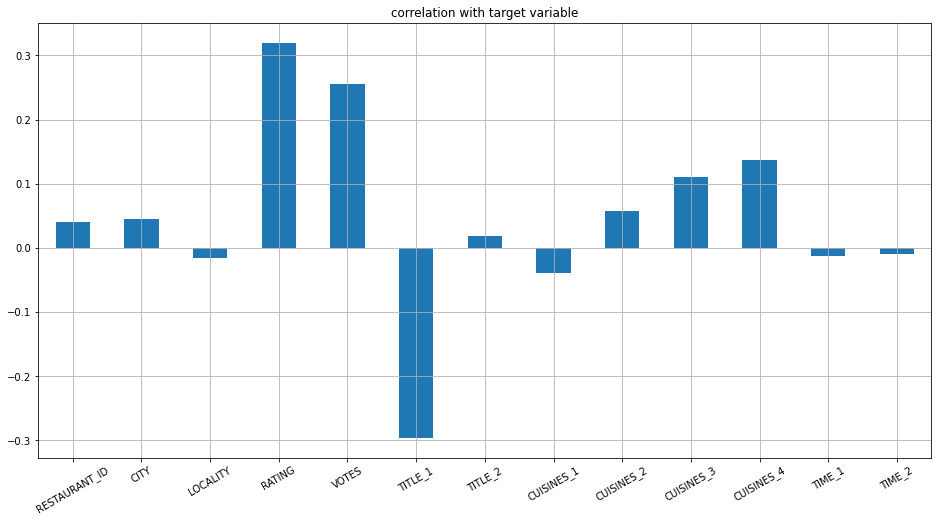

In [71]:
#checking correlation with target variable ie fees
plt.figure(figsize=(16,8))
Train_data.drop('COST',axis=1,).corrwith(Train_data['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title("correlation with target variable")

**Checking Outliers**

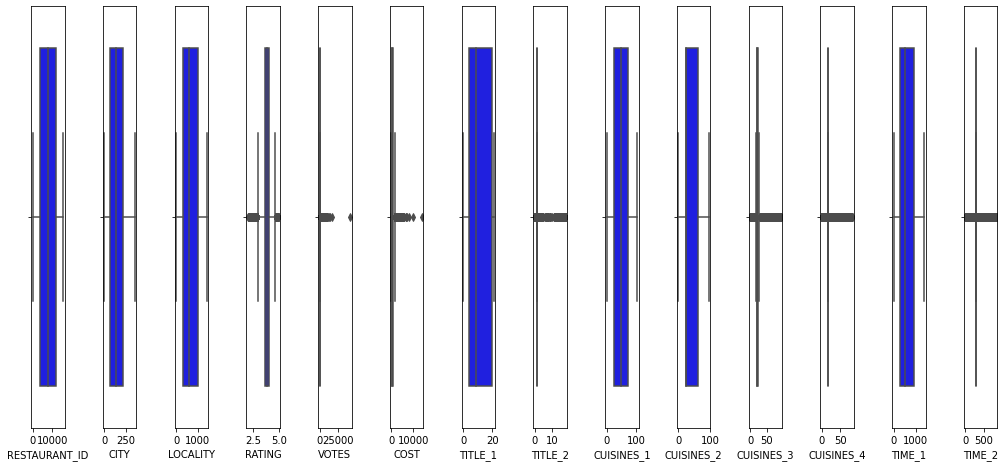

In [72]:
collist=train.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

In [73]:
train.skew()

RESTAURANT_ID     0.006947
CITY              0.266332
LOCALITY          0.352317
RATING           -0.537487
VOTES            14.609221
COST              3.978801
TITLE_1           0.053780
TITLE_2           4.677935
CUISINES_1        0.026008
CUISINES_2        0.866722
CUISINES_3        1.710974
CUISINES_4        2.771886
TIME_1            0.635672
TIME_2            2.669040
dtype: float64

VOTES and COST shows Positive Skewness and TITLE2 , COUSIN4 and TIME2 shows Negavive Skewness Present

**Removing Outliers**

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(train))
threshold=3
print(np.where(z>3))
z

(array([   15,    19,    19, ..., 12671, 12683, 12688]), array([ 7,  7, 13, ...,  7,  7, 11]))


array([[0.37269233, 2.11776187, 0.92054865, ..., 0.31186876, 0.62384243,
        0.62770823],
       [1.20737672, 0.8970816 , 0.98623851, ..., 0.31186876, 0.90384264,
        0.12864126],
       [0.70057234, 0.8970816 , 1.12404835, ..., 0.69789238, 0.66444536,
        0.12864126],
       ...,
       [0.74896628, 1.1525353 , 1.72790605, ..., 0.31186876, 0.17721025,
        0.12864126],
       [0.36076439, 0.8970816 , 0.05359943, ..., 3.87142739, 0.79979764,
        0.12864126],
       [0.29505519, 0.13443345, 1.70535535, ..., 0.31186876, 0.44874232,
        0.12864126]])

In [75]:
train_new=train[(z<3).all(axis=1)]

In [76]:
#checking the shape
print(train.shape,'\t\t',train_new.shape)

(12690, 14) 		 (10862, 14)


In [77]:
train=train_new
train.shape

(10862, 14)

## **Model Traning**

In [78]:
#splitting data into input and output variable
x=train.drop(columns=['COST'],axis=1)                 #separating independent and target variable
x.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49.0,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30.0,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221.0,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24.0,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165.0,8,1,28,23,21,18,316,291


In [79]:
y=train["COST"]
y.head()

0    1200
1    1500
2     800
3     800
4     300
Name: COST, dtype: int64

In [80]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(10862, 13) 		 (10862,)


In [81]:
#remove Skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [82]:
train.skew()

RESTAURANT_ID    0.015571
CITY             0.282745
LOCALITY         0.343827
RATING          -0.421987
VOTES            2.681786
COST             1.888589
TITLE_1         -0.020864
TITLE_2          5.791866
CUISINES_1      -0.003152
CUISINES_2       0.903446
CUISINES_3       1.852772
CUISINES_4       3.549151
TIME_1           0.682076
TIME_2           0.324744
dtype: float64

In [83]:
# scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [84]:
# Splitting the data into tranning and testing data
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [85]:
#checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(8689, 13) 		 (2173, 13)


In [86]:
#checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(8689,) 		 (2173,)


In [87]:
#Importing all the model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [88]:
lr=LinearRegression()
print('lr')
parameters ={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None]}
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

ls=Lasso()
parameters ={'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(1,10))}
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('ls')
print('*************************************')
print('\n')

rd=Ridge()
print('rd')
parameters ={'alpha':[.0001, .001, .01,.1 ,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[1e-3], 'random_state':list(range(0,10))}
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

en=ElasticNet()
print('en')
parameters ={'alpha':[.0001, .001, .01,.1 ,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'l1_ratio' :[0.5]}
clf=GridSearchCV(en,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

dt=DecisionTreeRegressor()
print('dt')
parameters ={'criterion':['mse','friedman_mse','mae'], 'splitter':['best','random']}
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

sv=SVR()
print('sv')
parameters= {'kernel':['linear','poly','rbf','sigmoid']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

sv=SVR()
parameters= {'gamma':['auto','scale']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

knn=KNeighborsRegressor()
print('knn')
parameters= {'algorithm':['auto','ball_tree','brute'],'leaf_size':[30],'n_jobs':[1,None],'metric_params':[None]}
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

lr
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
*************************************


{'alpha': 1, 'random_state': 1}
ls
*************************************


rd
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}
*************************************


en
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'normalize': False}
*************************************


dt
{'criterion': 'friedman_mse', 'splitter': 'best'}
*************************************


sv
{'kernel': 'linear'}
*************************************


{'gamma': 'auto'}
*************************************


knn
{'algorithm': 'auto', 'leaf_size': 30, 'metric_params': None, 'n_jobs': 1}
*************************************




In [89]:

model=[LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None, normalize=True),Lasso(alpha=1,random_state=1),Ridge(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True, random_state=0, tol=0.001),ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,normalize=False),DecisionTreeRegressor(criterion='friedman_mse', splitter='best'),KNeighborsRegressor(algorithm='brute', leaf_size=30, metric_params=None, n_jobs=1),SVR(kernel='linear', gamma='scale')]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Square Error:',mean_squared_error(y_test,predm))
    print("root mean squared Error:", np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*********************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) is: 0.284906724222456
Error
Mean Absolute Error: 254.76968192191097
Mean Square Error: 145417.05912024344
root mean squared Error: 381.33588753255765
r2_score: 0.2580212180268394
*********************************************************************************************


Score of Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=1, selection='cyclic',
      tol=0.0001, warm_start=False) is: 0.2848470607328719
Error
Mean Absolute Error: 254.40048299350758
Mean Square Error: 145322.59544716505
root mean squared Error: 381.2120085295911
r2_score: 0.25850321127794396
*********************************************************************************************


Score of Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=0, solver='auto', tol=0.001) is: 0.2837096251335445

In [90]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None, normalize=True),Lasso(alpha=1,random_state=1),Ridge(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True, random_state=0, tol=0.001),ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,normalize=False),DecisionTreeRegressor(criterion='friedman_mse', splitter='best'),KNeighborsRegressor(algorithm='brute', leaf_size=30, metric_params=None, n_jobs=1),SVR(kernel='linear', gamma='scale')]
for m in model:
    score=cross_val_score(m,x,y,cv=3,scoring='r2')
    print('Score of:',m,'is:',score)
    print('score:',score)
    print('mean score:',score.mean())
    print("Standard Deviation:",score.std())
    print('***************************************************************************************')
    print('\n')

Score of: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) is: [0.27967618 0.27619212 0.27581613]
score: [0.27967618 0.27619212 0.27581613]
mean score: 0.2772281426854224
Standard Deviation: 0.001737814321885401
***************************************************************************************


Score of: Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=1, selection='cyclic',
      tol=0.0001, warm_start=False) is: [0.27975273 0.27646046 0.27569965]
score: [0.27975273 0.27646046 0.27569965]
mean score: 0.2773042815328654
Standard Deviation: 0.001758955785846517
***************************************************************************************


Score of: Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=0, solver='auto', tol=0.001) is: [0.27998022 0.2750037  0.27388767]
score: [0.27998022 0.2750037  0.27388767]
mea

**Ensemble Technique**

In [91]:
adb=AdaBoostRegressor()
parameters={'base_estimator':[None],'n_estimators':[10,20,30,40,50],'loss':['linear', 'square', 'exponential']}
clf=GridSearchCV(adb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('adb')
print('*************************************')
print('\n')

{'base_estimator': None, 'loss': 'linear', 'n_estimators': 30}
adb
*************************************




In [92]:
gdb=GradientBoostingRegressor()
parameters = {'loss': ['ls','lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
clf=GridSearchCV(gdb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('gdb')
print('*************************************')
print('\n')

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}
gdb
*************************************




In [93]:
from sklearn.tree import ExtraTreeRegressor
ext=ExtraTreeRegressor()
parameters ={'criterion':['friedman_mse','mae','mse'], 'splitter':['random', 'best']}
clf=GridSearchCV(ext,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('ext')
print('*************************************')
print('\n')

{'criterion': 'friedman_mse', 'splitter': 'best'}
ext
*************************************




In [94]:
model=[ExtraTreeRegressor(criterion= 'friedman_mse', splitter='best'),AdaBoostRegressor(base_estimator= None, loss= 'exponential', n_estimators=10),GradientBoostingRegressor(criterion = 'mse', loss= 'ls', n_estimators= 200)]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Square Error:',mean_squared_error(y_test,predm))
    print("root mean squared Error:", np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*********************************************************************************************')
    print('\n')

Score of ExtraTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='best') is: 1.0
Error
Mean Absolute Error: 232.36723423838012
Mean Square Error: 128747.66221813162
root mean squared Error: 358.81424472577953
r2_score: 0.3430754674009029
*********************************************************************************************


Score of AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='exponential',
                  n_estimators=10, random_state=None) is: 0.40241150390075653
Error
Mean Absolute Error: 250.12070312497934
Mean Square Error: 123232.1604749176
root mean squared Error: 351.04438533455794
r2_score: 0.371217868919399
**************************************

In [95]:
from sklearn.model_selection import cross_val_score
model=[ExtraTreeRegressor(criterion= 'friedman_mse', splitter='best'),AdaBoostRegressor(base_estimator= None, loss= 'linear', n_estimators=20),GradientBoostingRegressor(criterion = 'mse', loss= 'ls', n_estimators= 200)]
for m in model:
    score=cross_val_score(m,x,y,cv=3,scoring='r2')
    print('Score of:',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print("Standard Deviation:",score.std())
    print('***************************************************************************************')
    print('\n')

Score of: ExtraTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='best') is:
score: [0.35512328 0.32308937 0.40296672]
mean score: 0.3603931240244691
Standard Deviation: 0.03282200968244158
***************************************************************************************


Score of: AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=20, random_state=None) is:
score: [0.36747232 0.35994957 0.37628145]
mean score: 0.36790111486255034
Standard Deviation: 0.006674351258512843
***************************************************************************************


Score of: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, cri

**The Best Model is ExtraTreeRegressor because of the score = 100% is Maximum**

In [96]:
ext=ExtraTreeRegressor(criterion= 'friedman_mse', splitter='best')
ext.fit(x_train,y_train)
print('score:',ext.score(x_train,y_train))
predext=ext.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,predext))
print('Mean Squared Error:',mean_squared_error(y_test,predext))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predext)))
print('\n')
print("r2_score",r2_score(y_test,predext))

score: 1.0


Mean absolute Error: 230.13575701794753
Mean Squared Error: 128499.75655775426
Root Mean Squared Error: 358.46862702020974


r2_score 0.344340385980909


## **Conclusion**

In [97]:
a=np.array(y_test)
a

array([1000,  650,  700, ..., 1300,  450,  800])

In [98]:
predicted=np.array(ext.predict(x_test))
predicted

array([ 800., 1000.,  200., ...,  800.,  400.,  900.])

In [99]:
train_com=pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))

In [100]:
train_com

,original,predicted
0,1000,800.0
1,650,1000.0
2,700,200.0
3,300,150.0
4,800,800.0
...,...,...
2168,800,600.0
2169,900,200.0
2170,1300,800.0
2171,450,400.0


In [101]:
#Saving the Model
import pickle
filename= 'Restaurent_FoodCost.pkl'
pickle.dump(ext,open(filename,'wb'))

**Using the Test Dataset**

In [102]:
#treating outliers using z score metod
from scipy.stats import zscore
z=np.abs(zscore(test))
z
threshold=3
print(np.where(z>3))

(array([   15,    19,    19, ..., 12671, 12683, 12688]), array([ 7,  7, 13, ...,  7,  7, 11]))


In [103]:
test_new=test[(z<3).all(axis=1)]

In [104]:
test_new

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49.0,1200,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30.0,1500,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221.0,800,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24.0,800,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165.0,300,8,1,28,23,21,18,316,291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12684,8324,252,723,3.8,492.0,550,4,1,72,23,21,18,290,291
12685,13228,131,342,3.8,546.0,500,20,1,72,17,44,18,521,338
12686,9686,222,133,4.3,1214.0,1800,4,1,37,25,21,18,536,479
12687,11133,239,1342,4.0,608.0,1300,14,1,34,25,4,18,519,291


In [105]:
import pickle
fitted_model=pickle.load(open("Restaurent_FoodCost.pkl","rb"))

In [106]:
fitted_model

ExtraTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='best')